# Regresión Lineal ##

## Introduccíon ##

Un problema de regresión lineal comprende el ejercicio de encontrar una relación entre dos o más variables considerando un grupo de datos numéricos y al poder explicar con una ecuación el comportamiento de los datos nosotros seriamos capaces de predecir el valor de una variable en función de otra con un grado determinado de error.

## Historia ##

<img src= "https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" alt ="Regresión" width =300 height=500>

\
El primer método de regresión lineal registrado en la historia es el de los mínimos cuadrados el cual fue publicado por Legendre en 1805, posteriormente te Gauss publicó un trabajo en donde desarrollaba de manera más profunda dicho método.
\
\
Linkn: https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal

## Planteamiento del algoritmo ##

En machine learning la regresión lineal es un algoritmo de aprendizaje supervisado que en su versión más sencilla consiste en trazar una recta que indicara la tendencia de un conjunto de datos continuos.
\
\
Linkn: https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
\
\
La formula de una recta es: $$Y=mX+b$$ Siendo Y la variable dependiente y X la variable independiente.


In [4]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
#carga de datos entrada
data = pd.read_csv("./articulos_ml.csv")
data.shape

(161, 8)

In [10]:
#acercamiento primeros 5 registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [11]:
#Estadisticas basicas de los datos de entrada
data.describe()


,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


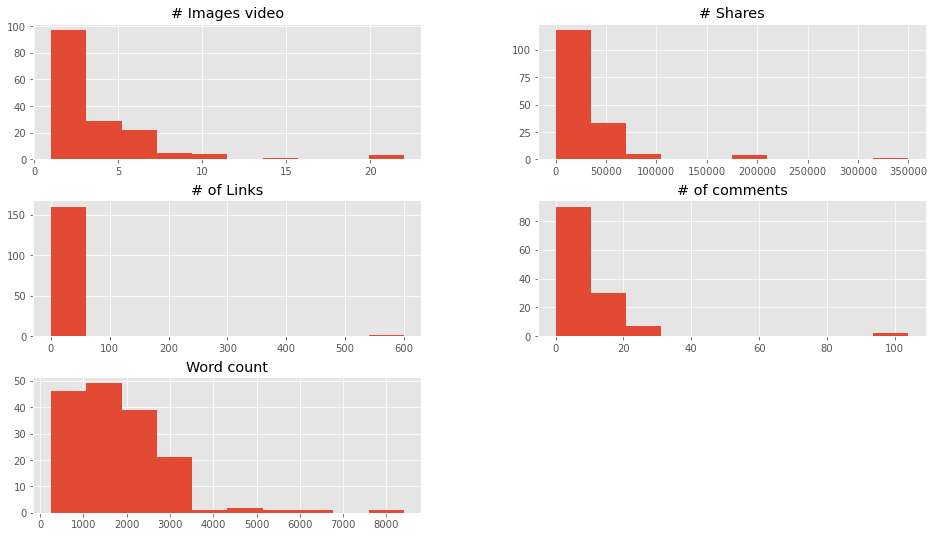

In [17]:
#visualizacion general de los datos
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

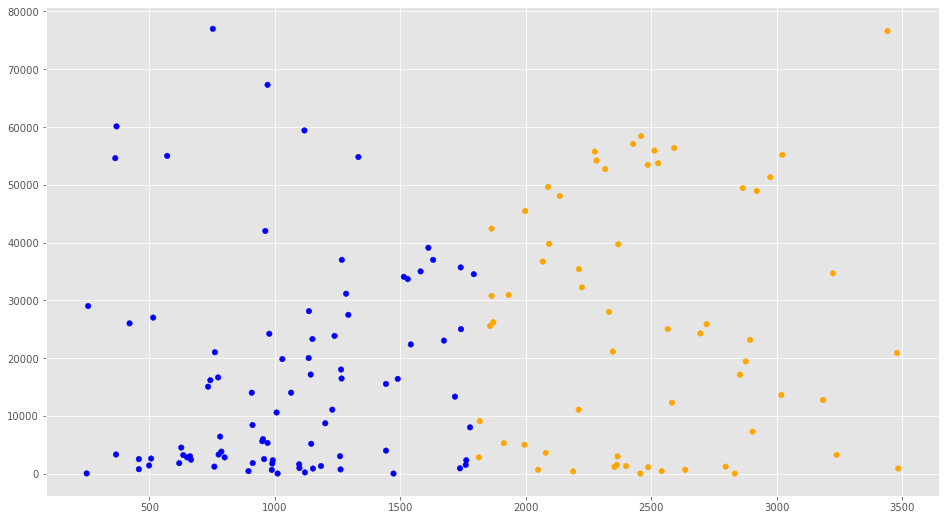

In [24]:
#Visualizacion de graficas con los datos
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1=filtered_data['Word count'].values
f2=filtered_data['# Shares'].values

#Pintar colores por debajo y encima de la media de cantidad de palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1,f2, c=asignar, s=tamanios[0])
plt.show()

In [31]:
#Asignamos X para entrenamiento y las etiquetas de Y
dataX=filtered_data[["Word count"]]
X_train=np.array(dataX)
Y_train=filtered_data['# Shares'].values

#Crear el objeto de regresion lineal
regr= linear_model.LinearRegression()

#Entrenamos el modelo
regr.fit(X_train,Y_train)

#Se hacen las predicciones que en definitiva una linea
Y_pred= regr.predict(X_train)

#Coeficientes obtenidos
print('Coefficients: \n', regr.coef_)
#Valor en donde corta el eje Y en X=0
print('Independent term: \n', regr.intercept_)
#Error cuadrado medio
print('Mean squared error: %.2f' % mean_squared_error(Y_train,Y_pred))
#puntaje de Varianza
print('Variance score: %.2f' % r2_score(Y_train,Y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


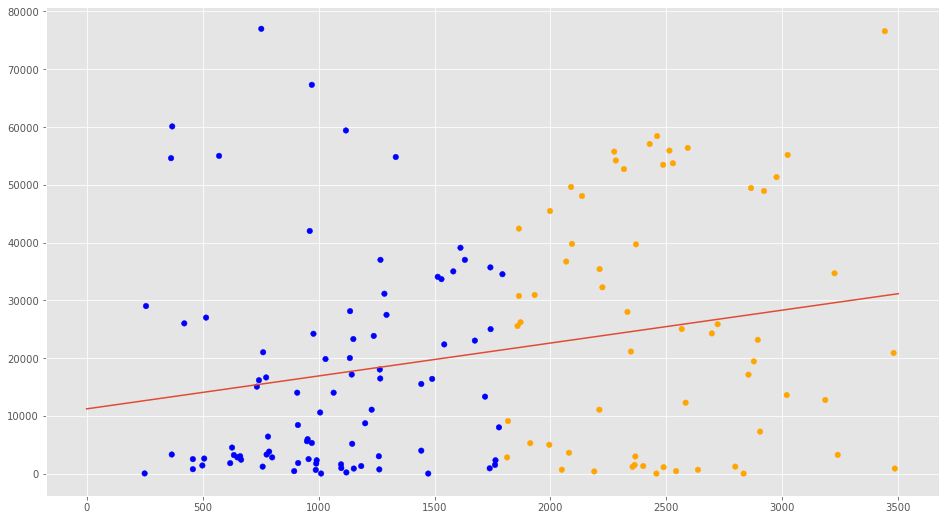

In [44]:
#Grafico de la recta
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1=filtered_data['Word count'].values
f2=filtered_data['# Shares'].values

#Pintar colores por debajo y encima de la media de cantidad de palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1,f2, c=asignar, s=tamanios[0])

#Y=X*5.69765366+11200.30322307416
X = np.linspace(0, 3500, 1000)
plt.plot(X, X*5.69765366+11200.30322307416)

plt.show()

## Conclusiones##
Al realizar la gráfica de nuestro conjunto de datos con la recta que obtuvimos mediante la regresión lineal podemos llegar a la conclusión que los datos aún están muy dispersos para que estos se logren interpretar adecuadamente por medio de una función polinómica de grado 1